In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

2023-12-03 17:09:41.347414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Function to load and preprocess CASME2 data
def load_and_preprocess_casme2_data(dataset_path, image_size):
    images = []
    labels = []

    classes = sorted(os.listdir(dataset_path))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Read and resize the image using OpenCV
            img = cv2.imread(image_path)
            img = cv2.resize(img, (image_size, image_size))  # Resize to desired dimensions
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Append the preprocessed image and its label to the lists
            images.append(img)
            labels.append(i)  # Assigning labels based on class index

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Example usage:
# dataset_path = r'C:\Users\Obey\OneDrive - Polytechnic University of the Philippines\Desktop\Thesis Tool\Dataset 5'
dataset_path = '/Users/jj/Documents/COLLEGE_DOCS/CASME2/Dataset_5'
image_size = 224  # Adjust the image size as needed

# Load and preprocess CASME2 data
images, labels = load_and_preprocess_casme2_data(dataset_path, image_size)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of train_images: ", X_train.shape)
print("Shape of test_images: ", X_test.shape)
print("Shape of train_labels: ", Y_train.shape)
print("Shape of test_labels: ", Y_test.shape)

Shape of train_images:  (328, 224, 224, 3)
Shape of test_images:  (83, 224, 224, 3)
Shape of train_labels:  (328, 1)
Shape of test_labels:  (83, 1)


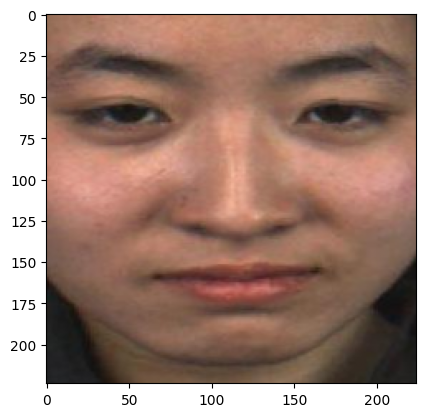

In [6]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx, :])
plt.show()

In [7]:
model = Sequential()

model.add(Conv2D(107, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(50, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(23, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(10, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
6/6 [==============================] - 46s 6s/step - loss: 0.7059 - accuracy: 0.5213
Epoch 2/10
6/6 [==============================] - 36s 6s/step - loss: 0.6962 - accuracy: 0.4482
Epoch 3/10
6/6 [==============================] - 37s 6s/step - loss: 0.6932 - accuracy: 0.5030
Epoch 4/10
6/6 [==============================] - 37s 6s/step - loss: 0.6931 - accuracy: 0.5274
Epoch 5/10
6/6 [==============================] - 38s 6s/step - loss: 0.6925 - accuracy: 0.5274
Epoch 6/10
6/6 [==============================] - 38s 6s/step - loss: 0.6926 - accuracy: 0.5274
Epoch 7/10
6/6 [==============================] - 39s 6s/step - loss: 0.6925 - accuracy: 0.5274
Epoch 8/10
6/6 [==============================] - 39s 6s/step - loss: 0.6937 - accuracy: 0.5274
Epoch 9/10
6/6 [==============================] - 40s 6s/step - loss: 0.6924 - accuracy: 0.5274
Epoch 10/10
6/6 [==============================] - 42s 7s/step - loss: 0.6932 - accuracy: 0.5274


In [10]:
model.evaluate(X_test, Y_test)

3/3 [==============================] - 3s 743ms/step - loss: 0.6919 - accuracy: 0.6386


[0.691866397857666, 0.6385542154312134]

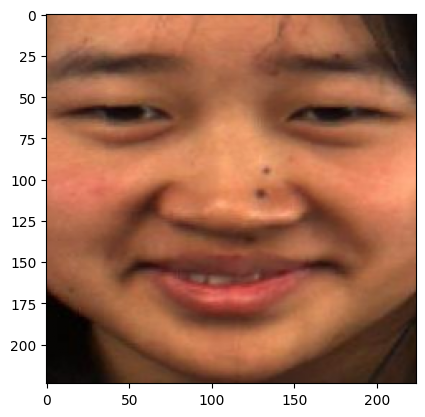

1/1 [==============================] - 0s 80ms/step
[[0.49770576]]
Apex Frame spotted


In [45]:
idx2 = random.randint(0, len(X_test) - 1)
plt.imshow(X_test[idx2, :])
plt.show()
label_pred = model.predict(X_test[idx2, :].reshape(1, 224, 224, 3))
print(label_pred)
label_pred = label_pred > 0.5

if (label_pred == 0):
    pred = "Apex Frame spotted"
else:
    pred = 'No Apex Frame spotted'

print(pred)

In [37]:
from keras.models import load_model

# Save the model
model.save('CNN_Including_OthersEmotion.keras')



In [38]:
# Load the model
loaded_model = load_model('/Users/jj/Documents/GitHub/Thesis_Tool/CNN_Including_OthersEmotion.keras')

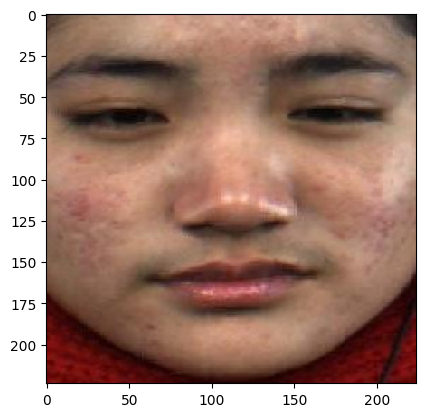

1/1 [==============================] - 0s 68ms/step
[[0.49746603]]
Apex Frame spotted


In [39]:
img_path = '/Users/jj/Documents/COLLEGE_DOCS/CASME2/Cropped/sub04/EP13_06f/reg_img108.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
label_pred = model.predict(img_array.reshape(1, 224, 224, 3))
print(label_pred)
label_pred = label_pred > 0.5

if (label_pred == 0):
    pred = "Apex Frame spotted"
else:
    pred = 'No Apex Frame spotted'

print(pred)

In [39]:
model.evaluate(X_test, Y_test)

3/3 [==============================] - 2s 699ms/step - loss: 0.7444 - accuracy: 0.5429


[0.7444149851799011, 0.5428571701049805]

Current directory: C:\Users\Obey\OneDrive - Polytechnic University of the Philippines\Desktop\Thesis Tool\Dataset 5


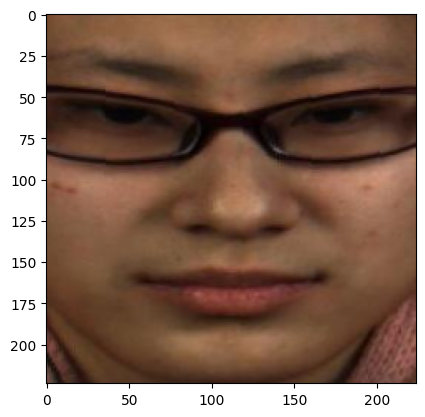

1/1 [==============================] - 0s 36ms/step
[[0.49716443]]


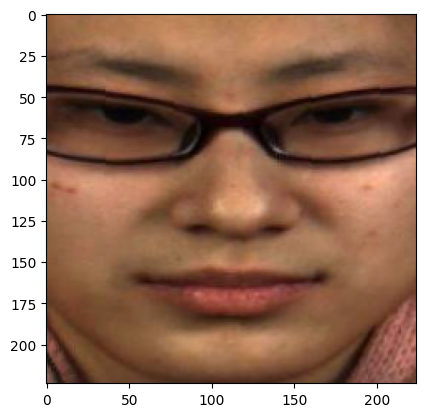

In [ ]:
cwd = os.path.realpath("Dataset 5")
print("Current directory:", cwd)

idx2 = random.randint(0, len(X_test))
img_name = X_test[idx2]
plt.imshow(X_test[idx2, :])
plt.show()
label_pred = model.predict(X_test[idx2, :].reshape(1, 224, 224, 3))
print(label_pred)
label_pred = label_pred > 0.5

# if (label_pred == 0):
#     pred = "Apex Frame spotted"
#     img = image.array_to_img(X_test[idx2], scale=True)
#     img_name = X_test[idx2]
#     img_path = os.path.join(cwd, img_name)
#     image.save_img(img_path, img)
#     print(img_path)

# else:
#     pred = 'No Apex Frame spotted'

# print(pred)
img = image.array_to_img(X_test[idx2], scale=True)
plt.imshow(img)
plt.show()

############## IDEA ###################
# Get the array of X_test[idx2] -> Turn array to image -> Save to variable


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import load_model
from keras.preprocessing import image
model = load_model('CNN_model.keras')
folder_path = r"C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped"
for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            img = image.load_img(file_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.
            label_pred = model.predict(img_array.reshape(1, 224, 224, 3))
            print(label_pred)
            label_pred = label_pred > 0.5

            if (label_pred == 0):
                pred = "Apex Frame Spotted"
                print(pred)
                print(file_path)
            else:
                pred = 'No Apex Frame spotted'
                print(pred)
                print(file_path)
# img_path = r"C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped\EP13_06f_frame18_Cropped.jpg"
# img = image.load_img(img_path, target_size=(224, 224))
# plt.imshow(img)
# plt.show()
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.
# label_pred = model.predict(img_array.reshape(1, 224, 224, 3))
# print(label_pred)
# label_pred = label_pred > 0.5

# if (label_pred == 0):
#     pred = "Apex Frame spotted"
# else:
#     pred = 'No Apex Frame spotted'

# print(pred)

1/1 [==============================] - 0s 64ms/step
[[0.7714185]]
No Apex Frame spotted
C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped\EP13_06f_frame10_Cropped.jpg
1/1 [==============================] - 0s 25ms/step
[[0.76660424]]
No Apex Frame spotted
C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped\EP13_06f_frame11_Cropped.jpg
1/1 [==============================] - 0s 26ms/step
[[0.75283223]]
No Apex Frame spotted
C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped\EP13_06f_frame12_Cropped.jpg
1/1 [==============================] - 0s 25ms/step
[[0.70880026]]
No Apex Frame spotted
C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped\EP13_06f_frame13_Cropped.jpg
1/1 [==============================] - 0s 27ms/step
[[0.6959959]]
No Apex Frame spotted
C:\Users\Obey\Documents\Trial for CNN-LBP Model\EP13_06f_Cropped\EP13_06f_frame14_Cropped.jpg
1/1 [==============================] - 0s 28ms/step
[[0.70492756]]
No Apex Frame spotte